In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


IMPORTING THE DEPENDENCIES

In [4]:
from ast import increment_lineno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
%matplotlib inline

In [5]:
#project path
project_path = '/content/drive/MyDrive/financial-product-recommendation-rag/data/raw'

LOADING THE DATA


In [7]:
application_df=pd.read_csv(project_path + '/application_train.csv')
bureau_df=pd.read_csv(project_path + '/bureau.csv')

In [8]:
#overview

print(application_df.shape)
print(bureau_df.shape)

(307511, 122)
(1716428, 17)


In [9]:
display(application_df.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
display(bureau_df.head())

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


PLOT OF THE DATA

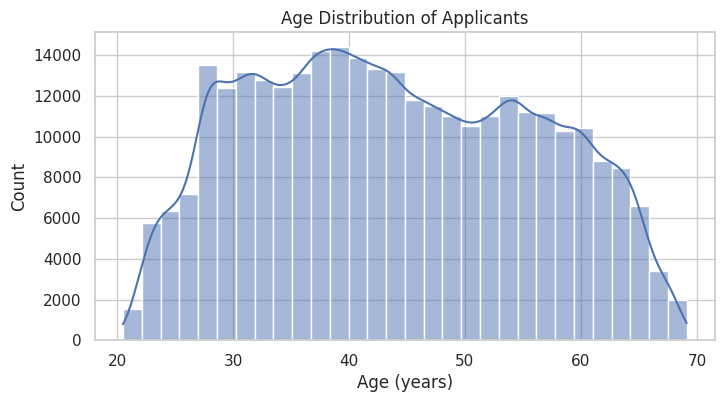

In [12]:
plt.figure(figsize=(8,4))
sns.histplot(application_df['DAYS_BIRTH']/ -365 ,bins=30 ,kde=True)
plt.title("Age Distribution of Applicants")
plt.xlabel("Age (years)")
plt.show()

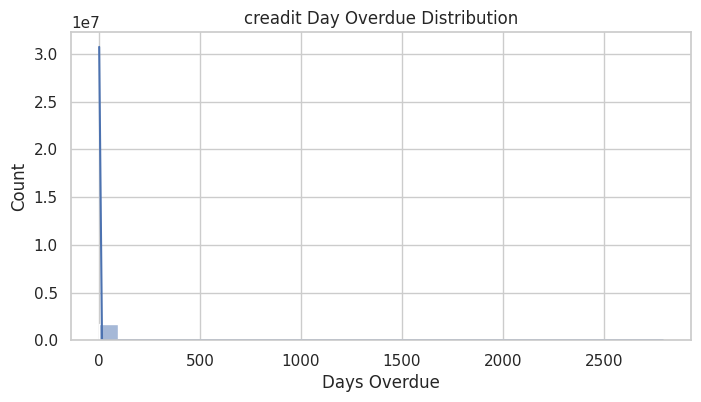

In [14]:
#Creadit balance distribution

plt.figure(figsize=(8,4))

sns.histplot(bureau_df['CREDIT_DAY_OVERDUE'].dropna(),bins=30,kde=True)
plt.title("creadit Day Overdue Distribution")
plt.xlabel("Days Overdue")
plt.show()

In [15]:
%cd /content/drive/MyDrive/financial-product-recommendation-rag
!ls



/content/drive/MyDrive/financial-product-recommendation-rag
configs  data  notebooks


In [16]:
!git
!git status

usage: git [--version] [--help] [-C <path>] [-c <name>=<value>]
           [--exec-path[=<path>]] [--html-path] [--man-path] [--info-path]
           [-p | --paginate | -P | --no-pager] [--no-replace-objects] [--bare]
           [--git-dir=<path>] [--work-tree=<path>] [--namespace=<name>]
           [--super-prefix=<path>] [--config-env=<name>=<envvar>]
           <command> [<args>]

These are common Git commands used in various situations:

start a working area (see also: git help tutorial)
   clone     Clone a repository into a new directory
   init      Create an empty Git repository or reinitialize an existing one

work on the current change (see also: git help everyday)
   add       Add file contents to the index
   mv        Move or rename a file, a directory, or a symlink
   restore   Restore working tree files
   rm        Remove files from the working tree and from the index

examine the history and state (see also: git help revisions)
   bisect    Use binary search to find th

In [20]:
%%bash
cat << 'EOF' > README.md
# Financial Product Recommendation Engine

## Objective
Build a financial product recommendation engine using demographic and bureau data with a RAG-based LLM architecture.

## Phase 1 – Data Understanding
- Loaded demographic and bureau datasets
- Explored dataset shapes and distributions
- Performed visual data understanding
- No preprocessing or modeling at this stage

## Status
Phase 1 completed.
EOF


In [23]:
!git init


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/drive/MyDrive/financial-product-recommendation-rag/.git/


In [24]:
!git add .


In [25]:
!git commit -m "Phase 1: Data understanding and project setup"


Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@eabeff6c9b04.(none)')


In [27]:
!git commit -m "Phase 1: Data understanding and project setup"


[master (root-commit) 36400a8] Phase 1: Data understanding and project setup
 3 files changed, 2023954 insertions(+)
 create mode 100644 README.md
 create mode 100644 data/raw/application_train.csv
 create mode 100644 data/raw/bureau.csv


In [28]:
!git remote add origin https://github.com/shivam-prajapat/financial-product-recommendation-rag.git

In [29]:
!git branch -M main


In [31]:
!git remote remove origin

In [33]:
!git config --global user.name "shivam-prajapat"
!git config --global user.email "shivam10f.aps@example.com"

In [34]:
!git remote add origin https://github.com/shivam-prajapat/financial-product-recommendation-rag.git

In [35]:
!git branch -M main

In [36]:
!git push -u origin main

fatal: could not read Username for 'https://github.com': No such device or address
